<a href="https://colab.research.google.com/github/GOWRIHARSHITHA/Hate-speech-Detection/blob/main/Hate_speech_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
dataset=pd.read_csv("/content/labeled_data.csv")
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [ ]:
dataset.isnull()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
24778,False,False,False,False,False,False,False
24779,False,False,False,False,False,False,False
24780,False,False,False,False,False,False,False
24781,False,False,False,False,False,False,False


In [ ]:
dataset.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [ ]:
dataset.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [ ]:
dataset['labels']=dataset["class"].map({0:"Hate Speech",
                                        1:"Offensice Language",
                                        2:"No hate or offensive language"})

In [ ]:
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No hate or offensive language
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensice Language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensice Language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensice Language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensice Language
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensice Language
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",No hate or offensive language
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,Offensice Language
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,Offensice Language


In [ ]:
data=dataset[["tweet","labels"]]

In [ ]:
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No hate or offensive language
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensice Language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensice Language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensice Language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensice Language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensice Language
24779,"you've gone and broke the wrong heart baby, an...",No hate or offensive language
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensice Language
24781,youu got wild bitches tellin you lies,Offensice Language


In [ ]:
import re
import nltk
import string
from nltk.corpus import stopwords
nltk.download("stopwords")
stopwords=set(stopwords.words("english"))
stemmer=nltk.SnowballStemmer("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def clean_data(text):
  text=str(text).lower()
  text=re.sub('https?://\S+|www|.S+', '',text)
  text=re.sub('\[.*?\]', '',text)
  text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
  text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
  text = re.sub(r'\n', '', text)  # Remove newline characters
  text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers
  text = [word for word in text.split() if word not in stopwords]
  text=" ".join(text)
  text=[stemmer.stem(word) for word in text.split(' ')]
  text=" ".join(text)
  return text


In [ ]:
data["tweet"]=data["tweet"].apply(clean_data)

<ipython-input-17-7cdb172179f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"]=data["tweet"].apply(clean_data)


In [ ]:
data

,tweet,labels
0,rt mayasolov woman shouldnt complain clean hou...,No hate or offensive language
1,rt boy dat coldtyga dwn bad cuffin dat hoe place,Offensice Language
2,rt urkindofbrand dawg rt ever fuck bitch start...,Offensice Language
3,rt cganderson vivabas look like tranni,Offensice Language
4,rt shenikarobert shit hear might true might fa...,Offensice Language
...,...,...
24778,yous muthafin lie coreyemanuel right tl trash ...,Offensice Language
24779,youv gone broke wrong heart babi drove redneck...,No hate or offensive language
24780,young buck wanna eat dat nigguh like aint fuck...,Offensice Language
24781,youu got wild bitch tellin lie,Offensice Language


In [ ]:
X=np.array(data["tweet"])
y=np.array(data["labels"])

In [ ]:
X

array(['rt mayasolov woman shouldnt complain clean hous amp man alway take trash',
       'rt boy dat coldtyga dwn bad cuffin dat hoe place',
       'rt urkindofbrand dawg rt ever fuck bitch start cri confus shit',
       ..., 'young buck wanna eat dat nigguh like aint fuckin dis',
       'youu got wild bitch tellin lie',
       'ruffl ntac eileen dahlia beauti color combin pink orang yellow amp white coll'],
      dtype=object)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
cv=CountVectorizer()
X=cv.fit_transform(X)

In [ ]:
X

<24783x25677 sparse matrix of type '<class 'numpy.int64'>'
	with 197847 stored elements in Compressed Sparse Row format>

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [ ]:
X_train

<16604x25677 sparse matrix of type '<class 'numpy.int64'>'
	with 132611 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)


DecisionTreeClassifier()

In [ ]:
y_pred=dt.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 148,   36,  281],
       [  34, 1105,  240],
       [ 211,  211, 5913]])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

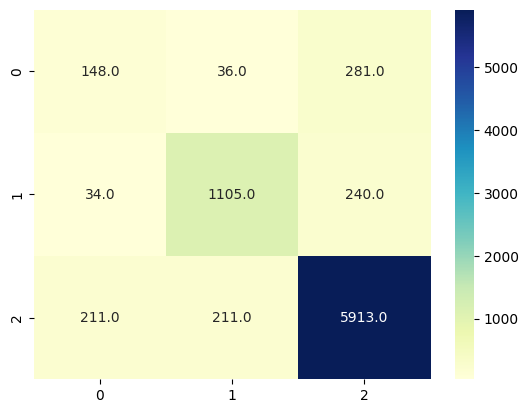

In [ ]:
sns.heatmap(cm,annot=True,fmt=".1f",cmap="YlGnBu")

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.87614622814525

In [ ]:
sample="Let's unite and kill all the people who are protesting against the government"
sample=clean_data(sample)

In [ ]:
sample

'let unit kill peopl protest govern'

In [ ]:
data1=cv.transform([sample]).toarray()

In [ ]:
data1

array([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
dt.predict(data1)

array(['Hate Speech'], dtype=object)